In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ip_path = "../../data/input/gt/"
working_path = "../../data/working/"
gt_data = pd.read_csv(ip_path + "answers.csv")
gt_data

,participant,doc,question,answer,correct
0,p01,1,1,2.0,NaN
1,p01,1,2,2.0,NaN
2,p01,1,3,3.0,NaN
3,p01,1,4,NaN,NaN
4,p01,1,5,NaN,NaN
...,...,...,...,...,...
2395,p20,20,2,NaN,NaN
2396,p20,20,3,NaN,NaN
2397,p20,20,4,NaN,NaN
2398,p20,20,5,NaN,NaN


In [3]:
gt_filt = gt_data.drop(['correct'], axis=1)
gt_filt = gt_filt[(gt_filt.question == 1) | (gt_filt.question == 2)]
gt_filt = gt_filt.dropna()

gt_filt = gt_filt.pivot_table(index=['participant','doc'], columns='question', values='answer').reset_index()
gt_filt = gt_filt.rename_axis(None, axis=1).reset_index(drop=True)

headers = ['participant', 'doc', 'understand', 'interest']
gt_filt.columns = headers


In [9]:
gt_filtered = gt_filt[(gt_filt.doc != 6) & (gt_filt.doc != 20)]


<Axes: xlabel='interest', ylabel='count'>

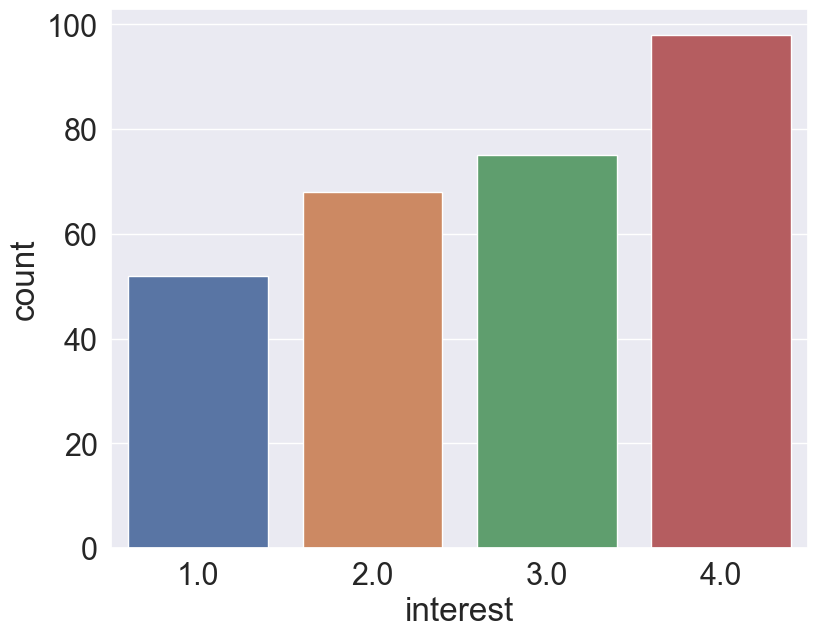

In [4]:
plt.figure(figsize=(9,7))

sns.set(font_scale=2) 
sns.countplot(x="interest", data=gt_filt)

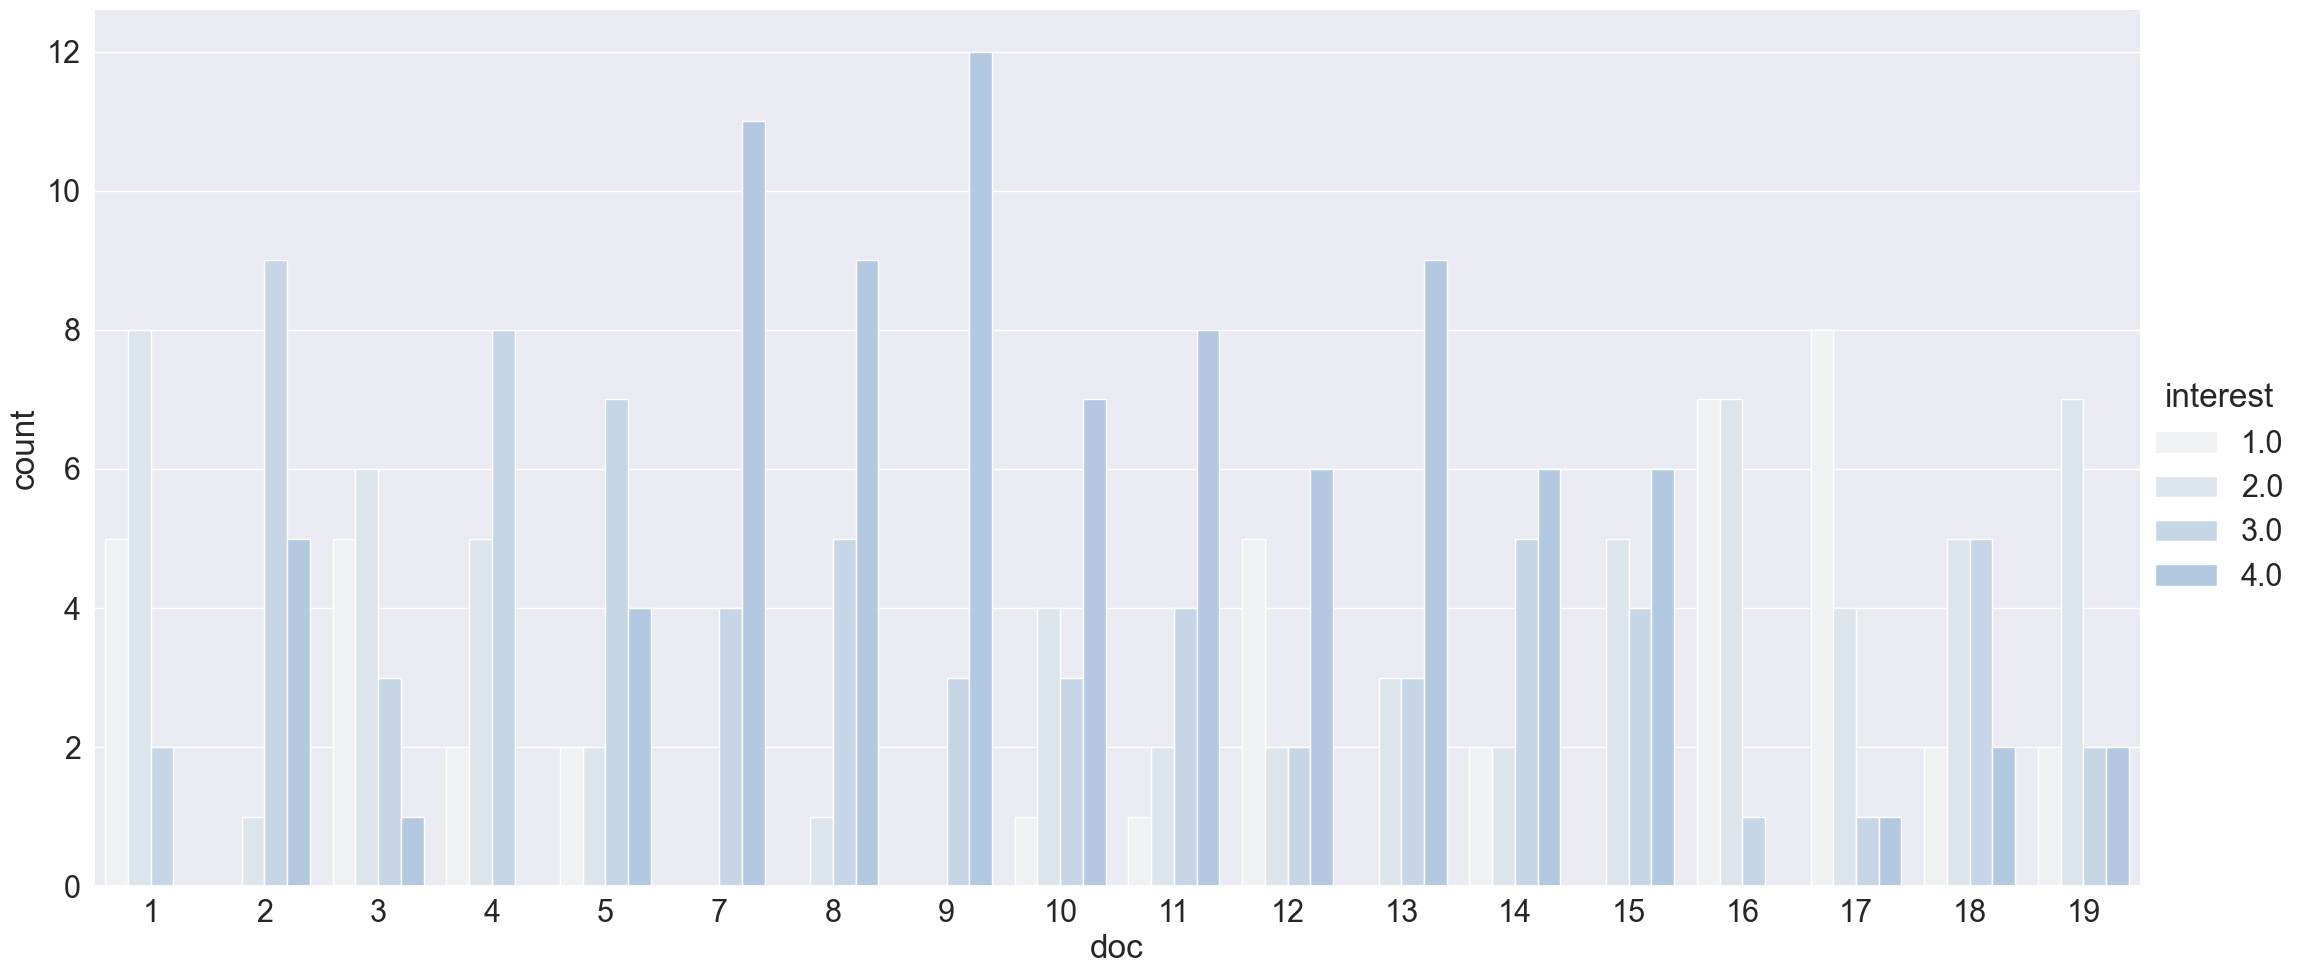

In [17]:
sns.catplot(x="doc", hue="interest", kind="count",
            data=gt_filtered, height=10.27, aspect=17.7/8.27, color= '#abc9ea')

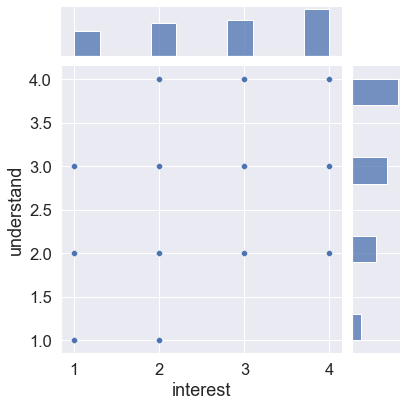

In [18]:
sns.jointplot(x = "interest", y="understand", data=gt_filt)


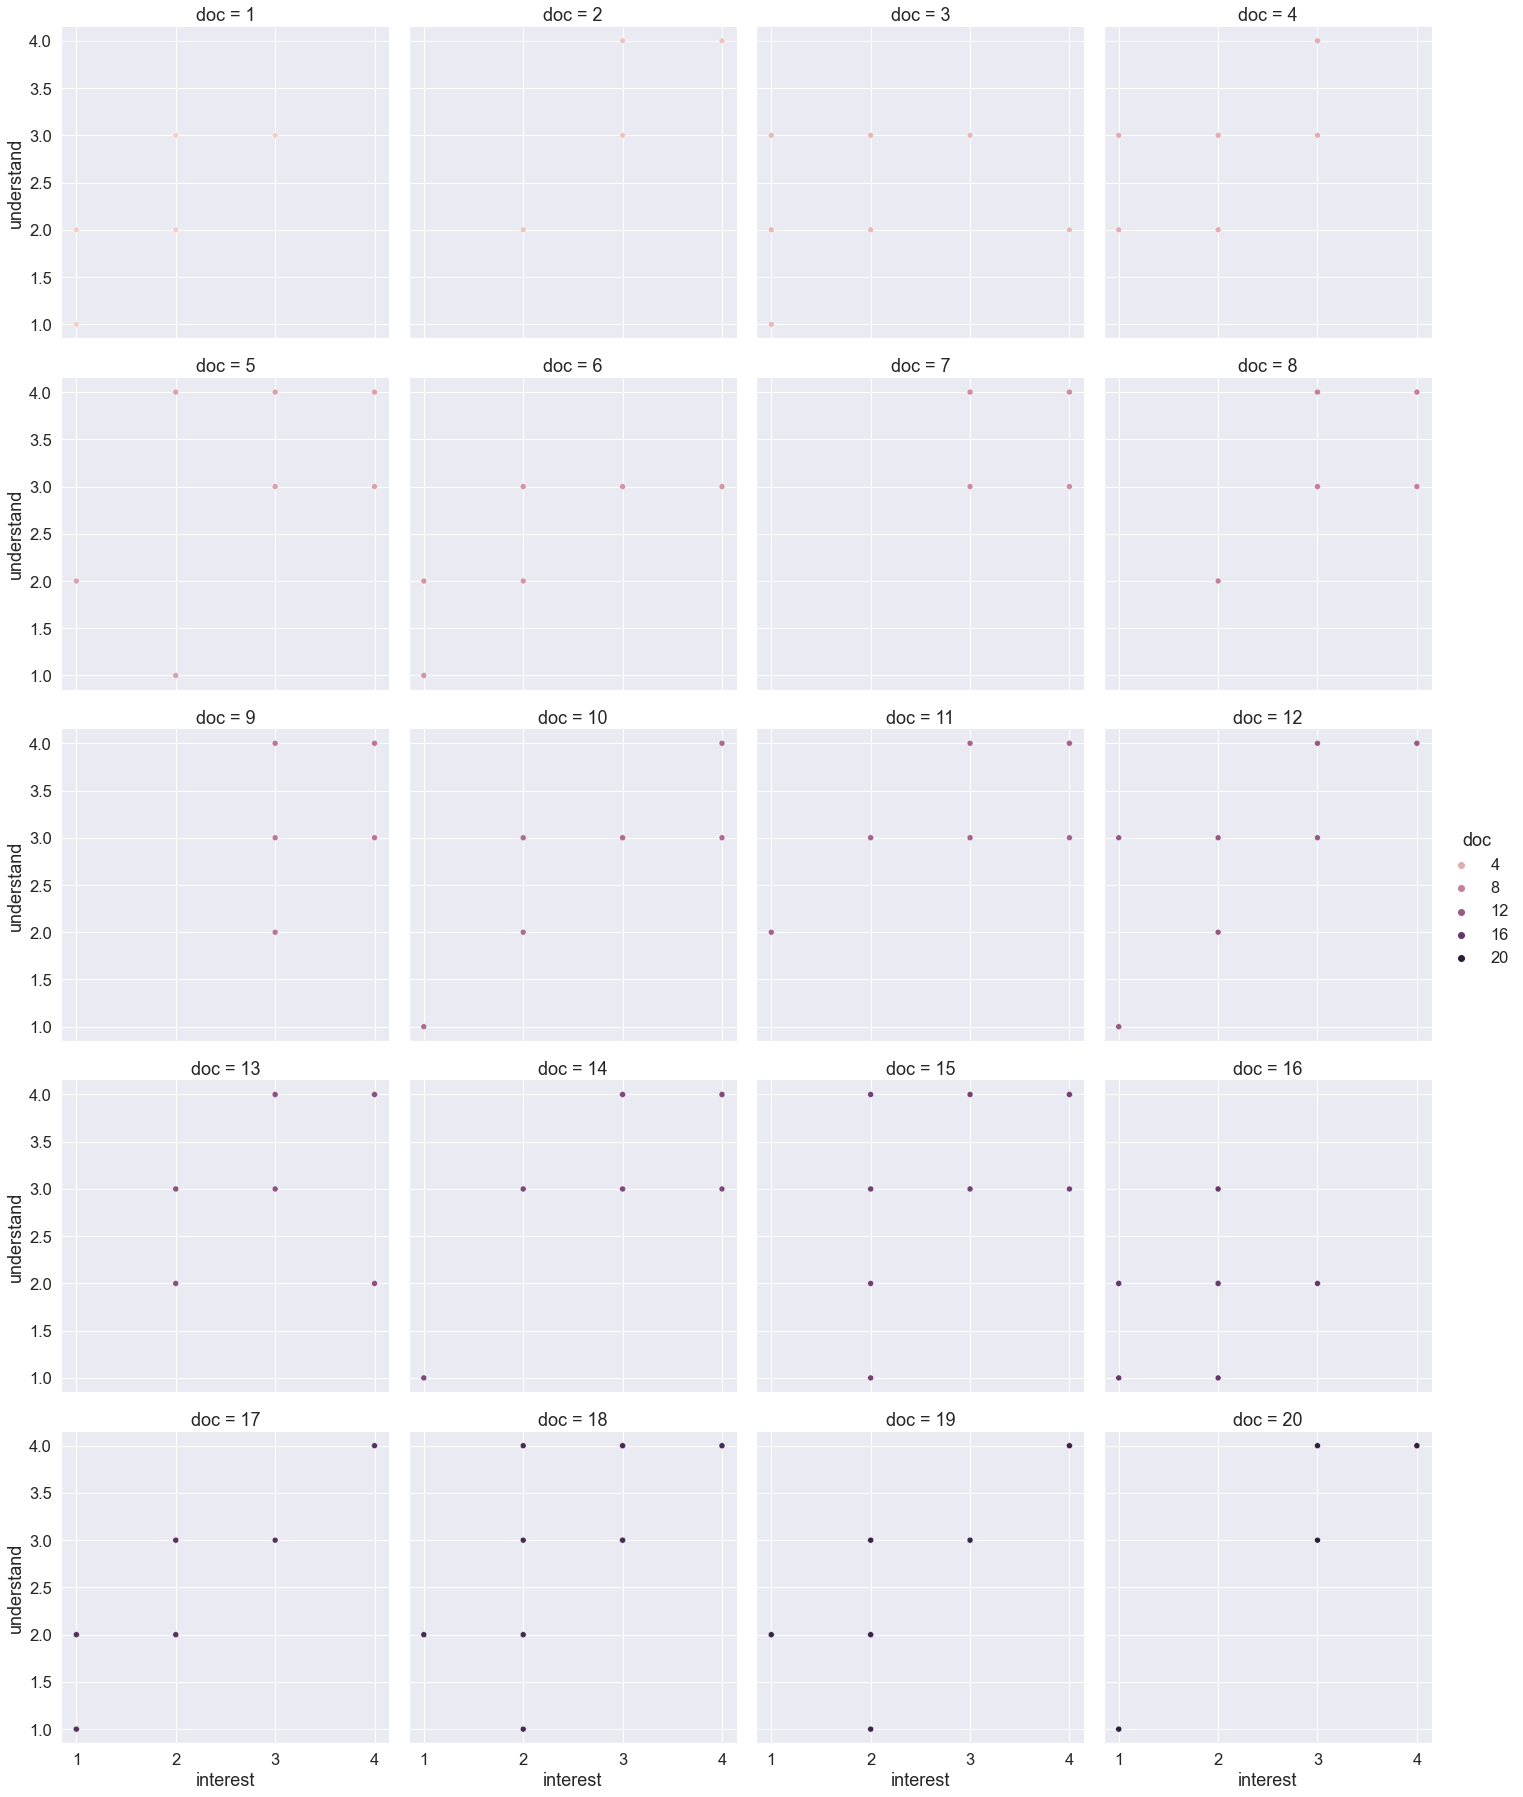

In [17]:
sns.relplot(x="interest", y="understand",hue= "doc",col="doc",col_wrap=4,kind='scatter', data=gt_filt)
